## **Data Science Aplicado a las Finanzas** 🚀
### **Sesión 8: Modelos de Volatilidad**

Andrés C. Medina Sanhueza

Senior Data Scientist Engineer 

anmedinas@gmail.com

In [1]:
from matplotlib import pyplot as plt 
from scipy.stats import lognorm
import statsmodels.api as sm
import pandas_datareader.data as web 
import pandas as pd 
import seaborn as sns
import yfinance as yf
import numpy as np

sns.set_style("dark")

## 🐦‍🔥 Simulación Estadística

En un contexto estadístico, entendemos por simulación estadística, la técnica de muestreo estadístico controlado, que se utiliza conjuntamente con un modelo, para obtener respuestas aproximadas a preguntas que surgen en problemas complejos de tipo probabilístico. En definitiva, estudios de simulación son experimentos informáticos que implican la `creación de datos mediante un muestreo pseudoaleatorio a partir de distribuciones de probabilidad conocidas`. Son una herramienta invaluable para la investigación estadística, en particular para la evaluación de nuevos métodos y para la comparación de métodos alternativos.


<div style="border: 1px solid #007acc; background-color: #e6f2ff; padding: 10px; border-radius: 5px;">

En un contexto financiero, la simulación estadística es una técnica utilizada para modelar y analizar la incertidumbre y el riesgo en la toma de decisiones y proyecciones financieras. Se basa en la generación de múltiples escenarios aleatorios para evaluar diferentes resultados posibles y estimar las probabilidades de ocurrencia de esos resultados. Esta técnica es especialmente útil cuando hay factores inciertos o variables que no pueden ser controladas con precisión.

</div>


In [2]:
uniform_samples = np.random.uniform(0, 1, 10)
print("Muestras de distribución uniforme:", uniform_samples)

Muestras de distribución uniforme: [0.71931923 0.88045751 0.23095928 0.52715683 0.79351983 0.84468009
 0.48926602 0.72227146 0.96628842 0.89565353]


In [3]:
normal_samples = np.random.normal(0, 1, 10)
print("Muestras de distribución normal:", normal_samples)

Muestras de distribución normal: [ 0.12670891  0.11342734  0.1572471  -1.4535363  -0.47837636 -0.70482224
  1.7579707  -1.45507498 -0.128504   -1.04373349]


### 📌 Simulación de Monte Carlo

La Simulación de Monte Carlo es un método estadístico utilizado para modelar situaciones donde la incertidumbre y el riesgo juegan un papel importante. Se basa en la generación de múltiples escenarios aleatorios para calcular posibles resultados, proporcionando una visión probabilística de los resultados esperados.

Algunos conceptos claves, son los siguientes:

* **`Aleatoriedad`**: El método utiliza números aleatorios o pseudoaleatorios para generar escenarios posibles de una variable incierta, que luego se analizan para obtener una estimación probabilística de los resultados.

* **`Distribución de probabilidades`**: La simulación de Monte Carlo asume que las variables de interés siguen una distribución probabilística (por ejemplo, normal, log-normal, uniforme). Cada iteración de la simulación genera un valor para cada variable basado en su distribución asignada.

* **`Iteraciones múltiples`**: La simulación se ejecuta muchas veces (miles o millones de veces), lo que permite obtener una variedad de escenarios posibles. Al final, los resultados de estas simulaciones se agregan para analizar la distribución de los resultados posibles.

* **`Análisis de incertidumbre`**: Monte Carlo es ideal para situaciones donde no se puede predecir el resultado exacto debido a la incertidumbre de las variables involucradas. El objetivo es evaluar cómo la incertidumbre en las entradas afecta las salidas del modelo.

### 📌 Modelos de Distribución Log-Normal

La relación entre los precios de los activos y la distribución lognormal se formalizó principalmente a través de la obra de los economistas y matemáticos en el siglo XX. Uno de los desarrollos más significativos fue el trabajo de `Louis Bachelier` en 1900, quien es considerado uno de los primeros en aplicar el análisis estocástico a los precios de los activos en su tesis doctoral **`Teoría de la especulación`**.

En dicha tesis, `Bachelier` propuso cinco aspectos claves:

1. **`Movimiento Aleatorio de los Precios`**: Los precios de los activos financieros se mueven de manera aleatoria, lo que significa que los cambios en los precios son impredecibles y no siguen un patrón predecible. Este concepto se formalizó a través de un proceso conocido como **`movimiento browniano`**, que describe la trayectoria de una partícula en un fluido en movimiento

    ![](https://i.sstatic.net/1b3rt.gif)

2. **`Distribución Normal de los Retornos`**: Bachelier asumió que los retornos (cambios en el precio) son normalmente distribuidos. Es decir, los cambios en el precio de un activo son el resultado de un proceso estocástico que sigue una distribución normal, lo que implica que los movimientos de precios pueden ser modelados usando estadísticas de media y varianza.

3. **`Cálculo de Opciones`**:
En su trabajo, Bachelier también introdujo conceptos que más tarde se utilizarían para el cálculo de precios de opciones. Su análisis incluía el valor de las opciones y su relación con la volatilidad de los precios subyacentes, aunque su enfoque era menos riguroso que el que se desarrollaría más tarde con el modelo de `Black-Scholes`.

4. **`Hipótesis de la Eficiencia del Mercado`**:
Esto implica que los especuladores no pueden obtener ganancias sistemáticas de los movimientos de precios ya que cualquier información nueva se incorpora rápidamente en los precios.

5. **`Implicaciones para la Especulación`**:
Bachelier describió la especulación como un juego de azar, donde los inversionistas buscan obtener ganancias a través de la compra y venta de activos basándose en sus expectativas sobre futuros movimientos de precios. Esto implica que, a largo plazo, la especulación puede ser riesgosa y no necesariamente rentable.

    ![](https://www.supplychaindataanalytics.com/wp-content/uploads/2021/11/montecarloanimation2-1.gif)


YF.download() has changed argument auto_adjust default to True


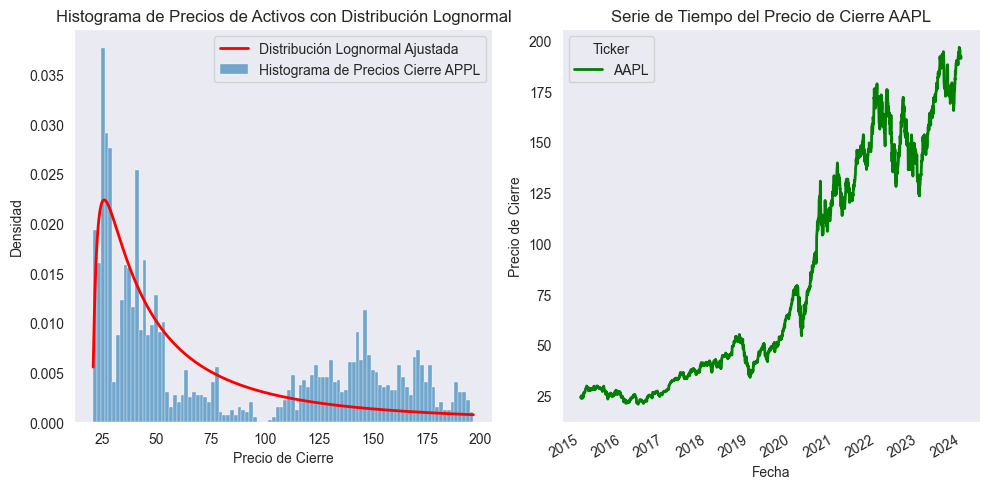

In [4]:
# Descargar precios históricos de Apple (AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start = '2015-01-01', end = '2024-01-01', progress = False)['Close']

# Obtener precios de cierre de Apple
closing_prices = data.astype(float).values

# Ajustar y Graficar la distribución lognormal
shape, loc, scale = lognorm.fit(closing_prices)

# Configuración de la figura y subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

# Subplot 1: Histograma de precios de cierre y distribución lognormal
sns.histplot(closing_prices, bins = 100, kde = False, ax = ax1, color = 'blue',
             stat = 'density', alpha = 0.6, label = 'Histograma de Precios Cierre APPL')
x = np.linspace(min(closing_prices), max(closing_prices), 1000)
pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)  # Densidad de probabilidad
ax1.plot(x, pdf, 'r-', lw=2, label='Distribución Lognormal Ajustada')
ax1.set_title('Histograma de Precios de Activos con Distribución Lognormal')
ax1.set_xlabel('Precio de Cierre')
ax1.set_ylabel('Densidad')
ax1.legend()

# Subplot 2: Serie de tiempo del precio del activo
data.plot(ax=ax2, color='green', lw=2)
ax2.set_title('Serie de Tiempo del Precio de Cierre AAPL')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Precio de Cierre')

# Ajustar el layout
plt.tight_layout()
plt.show()


Algunas de las razones por la que los precios se distribuyen lognormales.

1. **`Crecimiento Compuesto`**: Los precios de los activos tienden a crecer de forma compuesta en el tiempo. Esto significa que, en lugar de crecer linealmente, el crecimiento se basa en el precio actual, lo que lleva a que los cambios porcentuales en los precios sigan un comportamiento multiplicativo. Cuando los retornos de los precios (es decir, los cambios porcentuales) son independientes y están distribuidos normalmente, el precio de los activos (resultado de aplicar cambios porcentuales) se distribuye lognormalmente.

2. **`Movimiento Browniano Geometrico`**: En la teoría financiera, se modela el comportamiento de los precios de los activos mediante el movimiento browniano geométrico. Este modelo asume que los retornos logarítmicos son normalmente distribuidos, lo que implica que los precios siguen una distribución lognormal.

3. **`Naturaleza de los Precios`**: Los precios de los activos no pueden ser negativos, lo que también favorece una distribución que se extiende hacia la derecha (cola a la derecha), característica de la distribución lognormal.

4. **`Observaciones Empiricas`** Estudios empíricos han demostrado que los precios de los activos en los mercados financieros suelen mostrar esta propiedad lognormal. Por ejemplo, análisis de precios de acciones, bienes raíces y otros activos han revelado que sus distribuciones se ajustan bien a la lognormal.


---

**Ejercicio** La distribución Lognormal($\mu$,$\sigma$) tiene la siguiente ${\it pdf}$

  \begin{equation*}
  f(x;\mu,\sigma) = \frac{1}{x\sigma\sqrt{2\pi}}\exp{\left(-\frac{(\ln{(x)}-\mu)^2}{2\sigma^2}
    \right)}\quad x>0
  \end{equation*}

* Usando la transformación de [Box-Muller](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) y el método de transformación
inversa vista en sesiones anteriores, obtenga 1.000 muestras aleatorias y compare la densidad de la variable generada con la curva de densidad lognormal teórica con `scipy`. Aumente la cantidad a 10.000 y compare.

* Descarge la serie de precios del S\&P500 frecuencia mensual (Close) y obtenga el retorno promedio. ¿ Qué relación existe entre el precio del activo y los retornos en relación a la función de densidad anterior?. Mediante un experimento Montecarlo, realice 10.000 simulaciones y obtenga el retorno promedio. Realice histograma.



### 📌 Simulación de Precios de Activos 

#### Proceso de Wienner y Movimiento Browniano

Un proceso de **`Wiener`**, también conocido como `Movimiento Browniano`, es un proceso estocástico que describe el comportamiento aleatorio de una partícula en el tiempo.  

Formalmente, la definicion es la siguiente: Un proceso de Wienner $W(t)$ es una familia de variables aleatorias que cumplen con las siguientes propiedades:

1. **`Inicializacion`**: $W(0)=0$ casi seguramente, esto es que el proceso en el $t=0$ el valor del proceso es 0.

2. **`Incrementos Independientes`**: Para cualquier conjunto de tiempos $t_0\leq t_1 \leq t_2 \leq \cdots \leq t_n$ , los incrementos $W(t_2)-W(t_1), W(t_3)-W(t_2), W(t_4)-W(t_3),\cdots W(t_n)-W(t_{n-1})$ son independientes entre sí.

3. **`Incrementos Gaussianos`**: Los incrementos $W(t)-W(s)$, para $0\leq s \leq t$ tienen distribucion normal, esto es $W(t)-W(s) \sim \mathcal{N}(0, t-s)$, Esto significa que los incrementos tienen una media de cero y una varianza igual a la duración del intervalo de tiempo $t-s$.

4. **`Continuidad`**: La trayectoria del proceso de Wiener es continua casi seguramente. Aunque el proceso presenta movimientos aleatorios, no presenta saltos abruptos; es decir, no se interrumpe en ningún momento en el tiempo.

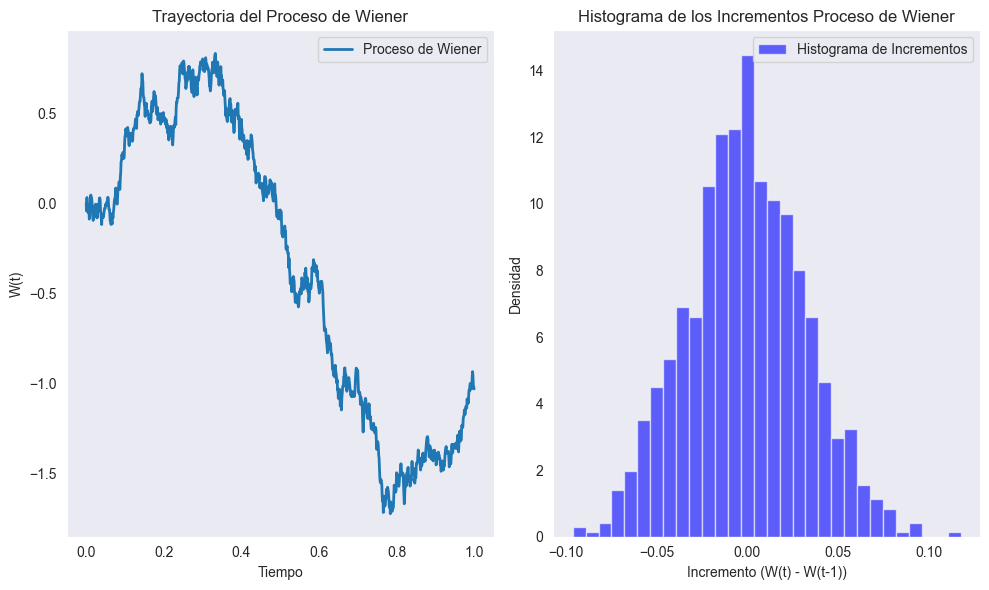

In [5]:
# Parámetros de la simulación
T = 1.0        # Tiempo total
N = 1000       # Número de pasos
dt = T / N     # Tamaño del paso
t = np.linspace(0, T, N + 1)  # Vector de tiempo

# Inicializar el proceso de Wiener
W = np.zeros(N + 1)

# Simular el proceso de Wiener
for i in range(1, N + 1):
    W[i] = W[i - 1] + np.random.normal(0, np.sqrt(dt))

# Calcular los Incrementos
increments = np.diff(W)  # Diferencias entre W(t) y W(t-1)

# Configuración de la figura y subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))

# Subplot 1: Trayectoria del proceso de Wiener
ax1.plot(t, W, label='Proceso de Wiener', lw = 2)
ax1.set_title('Trayectoria del Proceso de Wiener')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('W(t)')
ax1.legend()

# Subplot 2: Histograma de los incrementos del proceso de Wiener
ax2.hist(increments, bins = 30, color = 'blue', alpha = 0.6, density = True,
         label = 'Histograma de Incrementos')
ax2.set_title('Histograma de los Incrementos Proceso de Wiener')
ax2.set_xlabel('Incremento (W(t) - W(t-1))')
ax2.set_ylabel('Densidad')
ax2.legend()

# Ajustar el layout
plt.tight_layout()
plt.show()

La relación entre los precios de los activos y la distribución lognormal se formalizó principalmente a través de la obra de los economistas y matemáticos en el siglo XX. Uno de los desarrollos más significativos fue el trabajo de `Louis Bachelier` en 1900, quien es considerado uno de los primeros en aplicar el análisis estocástico a los precios de los activos en su tesis doctoral **`Teoría de la especulación`**.

En dicha tesis, `Bachelier` propuso cinco aspectos claves:

1. **`Movimiento Aleatorio de los Precios`**: Los precios de los activos financieros se mueven de manera aleatoria, lo que significa que los cambios en los precios son impredecibles y no siguen un patrón predecible. Este concepto se formalizó a través de un proceso conocido como **`movimiento browniano`**, que describe la trayectoria de una partícula en un fluido en movimiento.

2. **`Distribución Normal de los Retornos`**: Bachelier asumió que los retornos (cambios en el precio) son normalmente distribuidos. Es decir, los cambios en el precio de un activo son el resultado de un proceso estocástico que sigue una distribución normal, lo que implica que los movimientos de precios pueden ser modelados usando estadísticas de media y varianza.

3. **`Cálculo de Opciones`**:
En su trabajo, Bachelier también introdujo conceptos que más tarde se utilizarían para el cálculo de precios de opciones. Su análisis incluía el valor de las opciones y su relación con la volatilidad de los precios subyacentes, aunque su enfoque era menos riguroso que el que se desarrollaría más tarde con el modelo de `Black-Scholes`.

4. **`Hipótesis de la Eficiencia del Mercado`**:
Esto implica que los especuladores no pueden obtener ganancias sistemáticas de los movimientos de precios ya que cualquier información nueva se incorpora rápidamente en los precios.

5. **`Implicaciones para la Especulación`**:
Bachelier describió la especulación como un juego de azar, donde los inversionistas buscan obtener ganancias a través de la compra y venta de activos basándose en sus expectativas sobre futuros movimientos de precios. Esto implica que, a largo plazo, la especulación puede ser riesgosa y no necesariamente rentable.

Algunas de las razones por la que los precios se distribuyen lognormales.

1. **`Crecimiento Compuesto`**: Los precios de los activos tienden a crecer de forma compuesta en el tiempo. Esto significa que, en lugar de crecer linealmente, el crecimiento se basa en el precio actual, lo que lleva a que los cambios porcentuales en los precios sigan un comportamiento multiplicativo. Cuando los retornos de los precios (es decir, los cambios porcentuales) son independientes y están distribuidos normalmente, el precio de los activos (resultado de aplicar cambios porcentuales) se distribuye lognormalmente.

2. **`Movimiento Browniano Geometrico`**: En la teoría financiera, se modela el comportamiento de los precios de los activos mediante el movimiento browniano geométrico. Este modelo asume que los retornos logarítmicos son normalmente distribuidos, lo que implica que los precios siguen una distribución lognormal.

3. **`Naturaleza de los Precios`**: Los precios de los activos no pueden ser negativos, lo que también favorece una distribución que se extiende hacia la derecha (cola a la derecha), característica de la distribución lognormal.

4. **`Observaciones Empiricas`** Estudios empíricos han demostrado que los precios de los activos en los mercados financieros suelen mostrar esta propiedad lognormal. Por ejemplo, análisis de precios de acciones, bienes raíces y otros activos han revelado que sus distribuciones se ajustan bien a la lognormal.

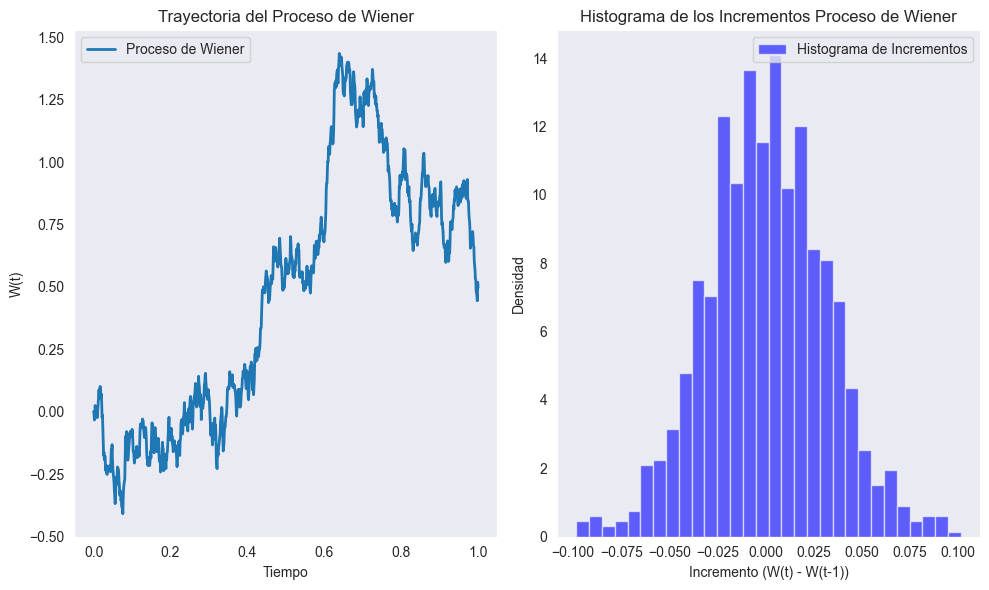

In [6]:
# Parámetros de la simulación
T = 1.0        # Tiempo total
N = 1000       # Número de pasos
dt = T / N     # Tamaño del paso
t = np.linspace(0, T, N + 1)  # Vector de tiempo

# Inicializar el proceso de Wiener
W = np.zeros(N + 1)

# Simular el proceso de Wiener
for i in range(1, N + 1):
    W[i] = W[i - 1] + np.random.normal(0, np.sqrt(dt))

# Calcular los Incrementos
increments = np.diff(W)  # Diferencias entre W(t) y W(t-1)

# Configuración de la figura y subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))

# Subplot 1: Trayectoria del proceso de Wiener
ax1.plot(t, W, label='Proceso de Wiener', lw = 2)
ax1.set_title('Trayectoria del Proceso de Wiener')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('W(t)')
ax1.legend()

# Subplot 2: Histograma de los incrementos del proceso de Wiener
ax2.hist(increments, bins = 30, color = 'blue', alpha = 0.6, density = True,
         label = 'Histograma de Incrementos')
ax2.set_title('Histograma de los Incrementos Proceso de Wiener')
ax2.set_xlabel('Incremento (W(t) - W(t-1))')
ax2.set_ylabel('Densidad')
ax2.legend()

# Ajustar el layout
plt.tight_layout()
plt.show()

#### Movimiento Browniano Geométrico

El `Movimiento Browniano Geométrico` se formalizó en el contexto del modelo de valoración de opciones de Fischer Black, Myron Scholes y Robert Merton en la década de 1970. Este modelo se utiliza para derivar la fórmula de Black-Scholes para la valoración de opciones, que asume que los precios de los activos siguen un `GBM`. Formalmente, `GBM` es un proceso estocástico que se describe mediante la siguiente ecuación diferencial estocástica (EDE):


\begin{equation*}
dS(t) = \mu S(t)dt + \sigma S(t) dW(t)
\end{equation*}

Donde:

* $S(t)$ es el precio del activo en el tiempo $t$.
* $\mu$ es la tasa de crecimiento esperada (drift) del activo.
* $\sigma$ es la volatilidad del activo (desviación estándar de los retornos).
* $dW(t)$ es el incremento de un proceso de Wiener (movimiento browniano) en el tiempo

Algunas propiedades:

* **`Log-Normalidad`**: La solución a la ecuación diferencial anterior indica que el logaritmo de los precios de los activos, $\log{(S(t))}$ sigue una distribución normal. Por lo tanto $S(t)$ tiene distribucion lognormal, esto es $S(t)\sim\hbox{LogNormal}(\tilde{\mu} t, \sigma^2 t)$ donde $\tilde{\mu} = \left(\mu-\frac{1}{2}\sigma^2 \right)$

* **`Continuidad`** El movimiento browniano geométrico tiene trayectorias continuas, lo que significa que no hay saltos en los precios del activo.

* **`No Negatividad`** Dado que los precios de los activos no pueden ser negativos, el movimiento browniano geométrico asegura que $S(t)$ tiene precio positivo.

La solucion general del `GBM` es

\begin{equation*}
S(t) = S(0)\exp\left( \left(\mu-\frac{1}{2}\sigma^2 \right)t + \sigma W(t)\right)
\end{equation*}

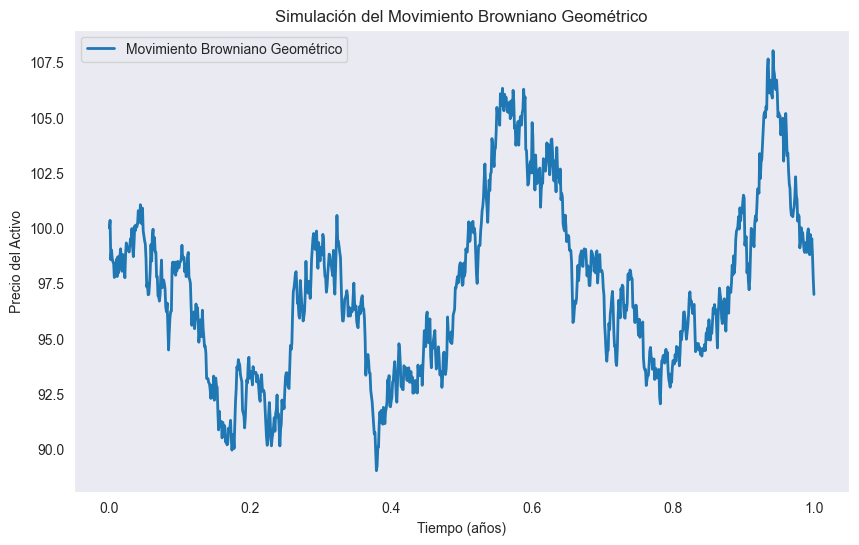

In [7]:
# Parámetros de la simulación
S0 = 100     # Precio inicial del activo
mu = 0.1     # Tasa de crecimiento esperada (drift)
sigma = 0.2  # Volatilidad del activo
T = 1.0      # Tiempo total (1 año)
N = 1000     # Número de pasos
dt = T / N   # Tamaño del paso
t = np.linspace(0, T, N + 1)  # Vector de tiempo

# Inicializar el precio del activo
S = np.zeros(N + 1)
S[0] = S0

# Simular el movimiento browniano geométrico
for i in range(1, N + 1):
    Z = np.random.normal(0, 1)  # Generar un número aleatorio de una normal estándar
    S[i] = S[i - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

# Graficar la trayectoria del movimiento browniano geométrico
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Movimiento Browniano Geométrico', lw=2)
plt.title('Simulación del Movimiento Browniano Geométrico')
plt.xlabel('Tiempo (años)')
plt.ylabel('Precio del Activo')
plt.legend()
plt.show()

/var/folders/nt/8nscwt3x5l1c4sllg6mw2zh80000gn/T/ipykernel_26419/2684234689.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S[i, j] = S[i - 1, j] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)


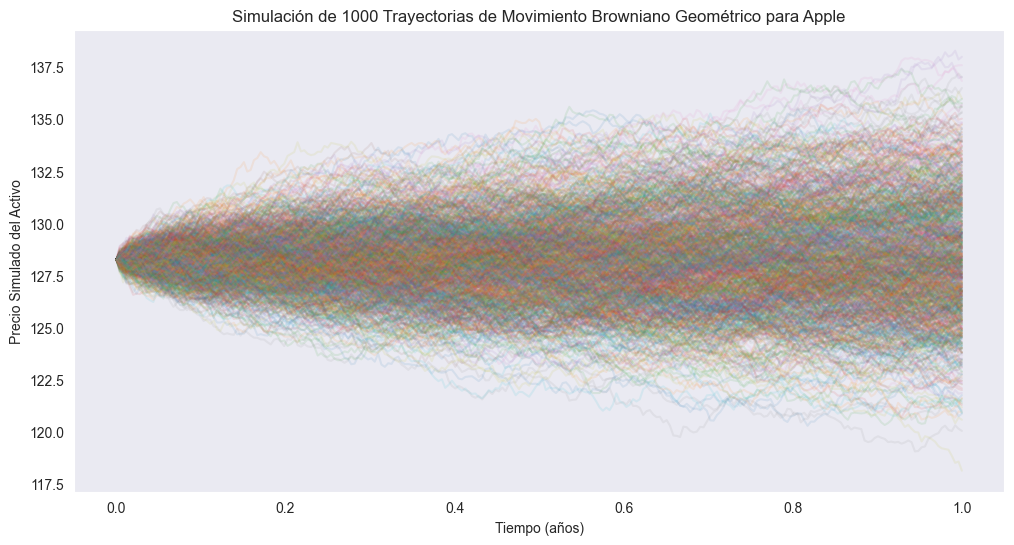

In [8]:
# Simulacion de Montecarlo para el GBM.

# 1. Descargar los datos de precios de cierre de Apple
ticker = 'AAPL'
data = yf.download(ticker, start = '2020-01-01', end = '2023-01-01', progress = False)
prices = data['Close']

# 2. Calcular la Tasa de Retorno y la Volatilidad
returns = prices.pct_change().dropna()
mu = returns.mean()    # Tasa de crecimiento esperada
sigma = returns.std()  # Volatilidad

# Parámetros de la simulación
S0 = prices.iloc[-1]  # Precio inicial (último precio de cierre)
T = 1.0               # Tiempo total (1 año)
N = 252               # Número de pasos (días de negociación)
dt = T / N            # Tamaño del paso
num_simulations = 1000  # Número de trayectorias a simular

# Inicializar el array para las trayectorias
S = np.zeros((N + 1, num_simulations))
S[0] = S0

# 3. Simular el Movimiento Browniano Geométrico
for j in range(num_simulations):
    for i in range(1, N + 1):
        Z = np.random.normal(0, 1)  # Generar un número aleatorio de una normal estándar
        S[i, j] = S[i - 1, j] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

# 4. Graficar las trayectorias simuladas
plt.figure(figsize=(12, 6))
for j in range(num_simulations):
    plt.plot(np.linspace(0, T, N + 1), S[:, j], alpha=0.1)  # Trayectorias individuales

plt.title('Simulación de 1000 Trayectorias de Movimiento Browniano Geométrico para Apple')
plt.xlabel('Tiempo (años)')
plt.ylabel('Precio Simulado del Activo')
plt.show()


#### Simulación de precios de Opciones

In [9]:
# Parámetros de la Opción
S0 = 100      # Precio inicial del activo subyacente
K = 105       # Precio de ejercicio (strike price)
T = 1.0       # Tiempo hasta el vencimiento (en años)
r = 0.05      # Tasa de interés libre de riesgo
sigma = 0.2   # Volatilidad del activo subyacente
num_simulations = 10000   # Número de simulaciones de Montecarlo
num_steps = 100           # Número de pasos en el tiempo

# Simulación de Trayectorias del Precio del Activo Subyacente
dt = T / num_steps  # Paso temporal
np.random.seed(42)  # Semilla para reproducibilidad

# Simulación del Precio del activo subyacente utilizando un GBM
def simulate_asset_price(S0, T, r, sigma, num_simulations, num_steps):
    prices = np.zeros((num_simulations, num_steps + 1))
    prices[:, 0] = S0
    for t in range(1, num_steps + 1):
        z = np.random.standard_normal(num_simulations)
        prices[:, t] = prices[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return prices

# Generar las Trayectorias de Precios Simuladas
simulated_prices = simulate_asset_price(S0, T, r, sigma, num_simulations, num_steps)

# Estimar el Precio de la Opción Europea de Compra
final_prices = simulated_prices[:, -1]
payoff = np.maximum(final_prices - K, 0)  # Payoff de la opción de compra
option_price = np.exp(-r * T) * np.mean(payoff)  # Descuento del payoff al valor presente

# Resultado
print(f"El precio estimado de la opción europea de compra es: {option_price:.2f}")


El precio estimado de la opción europea de compra es: 7.77


## Modelos de Volatilidad Estocastica

Recordar que una serie de tiempo, se puede descomponer en :

* `Tendencia` ($T$): Componente de largo plazo que muestra la dirección general de los datos.

* `Estacionalidad` ($S$): Componente que muestra patrones regulares y predecibles que se repiten en intervalos fijos de tiempo.

* `Ciclo` ($C$): Componente que muestra fluctuaciones irregulares en los datos a largo plazo que no son estacionales.

* `Ruido` ($N$): Componente aleatorio que no se puede explicar por los otros componentes, es decir, no se puede esperar predecir su impacto sobre la serie de tiempo.

Esto se puede expresar como:

\begin{equation*}
Y_t = T_t + S_t + C_t + N_t
\end{equation*}


In [10]:
def plot_ticker_series_and_returns(ticker: str, start_date: str = '2020-01-01', end_date: str = '2024-01-01'):
    """
    Dibuja un gráfico con dos subplots:
    1. La serie de precios de cierre ajustados del ticker.
    2. La serie de retornos logarítmicos diarios del ticker.

    :param ticker: El símbolo del ticker de la acción (ej. 'AAPL').
    :param start_date: La fecha de inicio para descargar los datos (formato 'YYYY-MM-DD').
    :param end_date: La fecha de fin para descargar los datos (formato 'YYYY-MM-DD').
    """
    # Descargar datos del ticker usando yfinance
    data = yf.download(ticker, start = start_date, end = end_date, progress = False)

    # Extraer la serie de precios de cierre ajustados
    adj_close = data['Close']

    # Calcular los retornos logarítmicos diarios
    returns = adj_close.pct_change().apply(lambda x: np.log(1 + x)).dropna()

    # Crear los subplots
    fig, ax = plt.subplots(1, 2, figsize = (11, 5))

    # Primer subplot: Serie de precios
    ax[0].plot(adj_close, label=f'{ticker} Adjusted Close', color='blue')
    ax[0].set_title(f'{ticker} Adjusted Close Prices')
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Adjusted Close Price')
    ax[0].legend()

    # Segundo subplot: Retornos logarítmicos
    ax[1].plot(returns, label=f'{ticker} Log Returns', color='green')
    ax[1].set_title(f'{ticker} Log Returns')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Log Return')
    ax[1].legend()

    # Ajustar el layout para evitar superposición
    plt.tight_layout()
    plt.show()

    # Retornar la serie de retornos calculados
    return returns

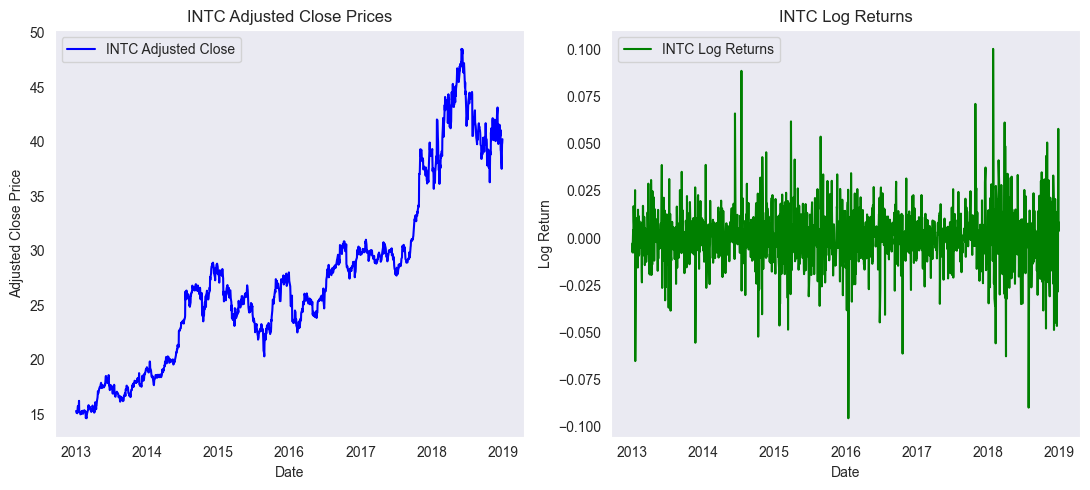

In [11]:
return_intc = plot_ticker_series_and_returns('INTC', start_date='2013-01-01', end_date='2018-12-31')

In [12]:
# Funcion que genera ACF y PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_acf_pacf(serie, lags = None):

  # Configuro la figura a mostrar como subplots
  fig, axes = plt.subplots(1, 2, figsize=(11,5))

  # Grafico ACF
  plot_acf(serie, lags = lags, ax = axes[0], title = '(ACF)', zero = True)

  # Grafico PACF
  plot_pacf(serie, lags = lags, ax = axes[1], title = '(PACF)', zero = True)

  # Visualiza
  plt.tight_layout()
  plt.show()

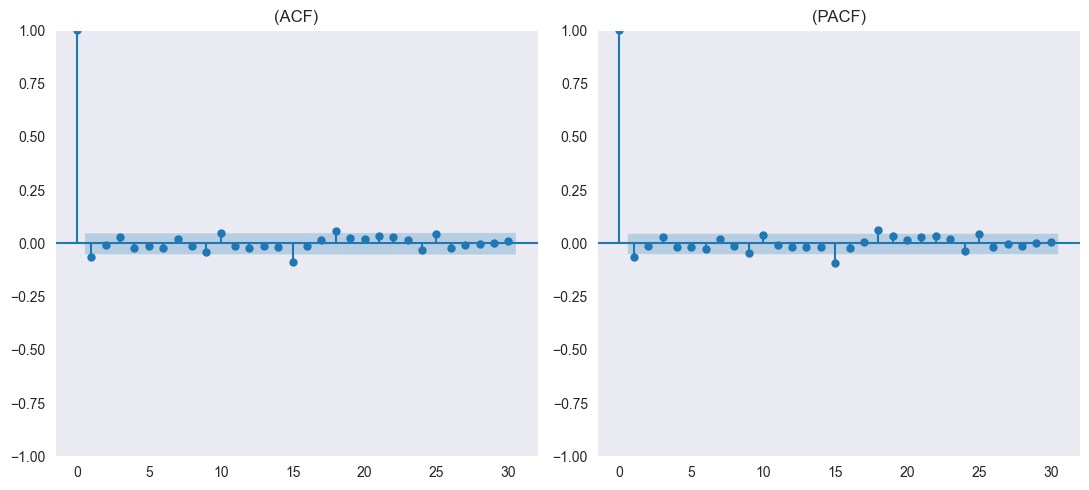

In [13]:
plot_acf_pacf(return_intc, lags = 30)

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Rango de órdenes a probar
p_values = range(0, 4)  # AR
q_values = range(0, 4)  # MA

# Guardar resultados
resultados = []

for p in p_values:
    for q in q_values:
        if p == 0 and q == 0:
            continue  # no tiene sentido un modelo ARMA(0, 0)
        try:
            modelo = ARIMA(return_intc, order = (p, 0, q), enforce_stationarity = False,
                           enforce_invertibility = False)
            resultado = modelo.fit()
            aic = resultado.aic
            bic = resultado.bic
            hqic = resultado.hqic
            
            resultados.append({
                'p': p,
                'q': q,
                'AIC': aic,
                'BIC': bic,
                'HQIC': hqic
            })
        except:
            continue  # si falla, lo ignora

/Users/anmedinas/Personales/Docencia/USACH/Master/DS_Finance/env_ds_finance/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anmedinas/Personales/Docencia/USACH/Master/DS_Finance/env_ds_finance/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anmedinas/Personales/Docencia/USACH/Master/DS_Finance/env_ds_finance/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anmedinas/Personales/Docencia/USACH/Master/DS_Fi

In [15]:
resultados_df = pd.DataFrame(resultados).sort_values(by = 'AIC').reset_index(drop = True)
print(resultados_df.sort_values('BIC'))

    p  q          AIC          BIC         HQIC
0   1  0 -8361.965736 -8346.012107 -8356.023815
1   0  1 -8355.808081 -8339.856444 -8349.866705
2   2  0 -8353.932242 -8332.663392 -8346.010406
3   1  1 -8353.808801 -8332.539951 -8345.886965
5   0  2 -8347.318109 -8326.051917 -8339.397000
4   2  1 -8352.636469 -8326.050407 -8342.734174
6   3  0 -8346.775017 -8320.192276 -8336.873630
7   1  2 -8345.594671 -8319.011930 -8335.693284
11  0  3 -8340.210635 -8313.631218 -8330.310157
8   3  1 -8344.704128 -8312.804839 -8332.822465
9   2  2 -8344.401719 -8312.502430 -8332.520055
12  1  3 -8338.837574 -8306.942273 -8326.957000
10  3  2 -8343.027364 -8305.811526 -8329.165422
13  2  3 -8336.846956 -8299.635771 -8322.986287
14  3  3 -8333.414046 -8290.886978 -8317.573281


(-0.2, 0.2)

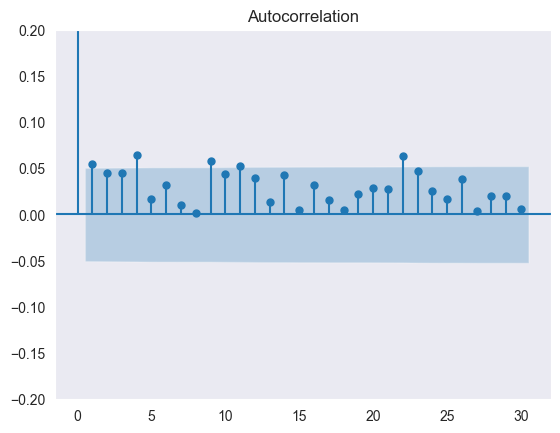

In [16]:
plot_acf(return_intc**2, lags = 30)
plt.ylim(-0.2, 0.2)

(-0.2, 0.2)

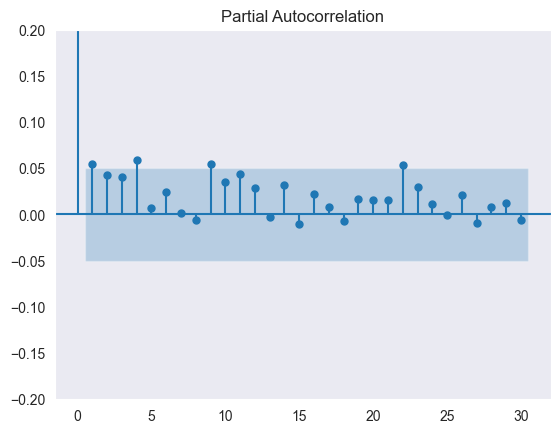

In [17]:
plot_pacf(return_intc**2, lags = 30)
plt.ylim(-0.2, 0.2)

### Hechos Estilizados de las Series Financieras

#### No Normalidad en los Retornos y Fat Tails

Los retornos de los activos financieros tienen distribuciones con colas más pesadas que una distribución normal. Esto significa que los eventos extremos (grandes subidas o bajadas) ocurren con mayor frecuencia de lo que predeciría una distribución normal.

In [18]:
from scipy.stats import norm, t, probplot

def plot_stock_returns_with_distribution(ticker, start_date, end_date):
    # Descargar datos de la serie financiera
    data = yf.download(ticker, start=start_date, end=end_date,  progress = False)

    # Calcular los retornos logarítmicos
    data['Returns'] = np.log(data['Close'] / data['Close'].shift(1)).dropna()

    # Eliminar el primer valor nulo
    returns = data['Returns'].dropna()

    # Crear subplots: uno para la serie de precios, otro para el histograma de retornos, y el Q-Q plot
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Subplot 1: Serie histórica de precios
    ax1.plot(data['Close'], label='Serie histórica de precios')
    ax1.set_title(f'Serie histórica de precios: {ticker}')
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Precio ajustado')
    ax1.legend()

    # Subplot 2: Histograma de retornos
    ax2.hist(returns, bins=50, density=True, alpha=0.6, color='blue', label='Retornos')

    # Ajuste a una distribución normal
    mu, std = norm.fit(returns)
    xmin, xmax = ax2.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax2.plot(x, p, 'k', linewidth=2, label='Normal')

    # Ajuste a una distribución t-Student
    df, loc, scale = t.fit(returns)
    p_t = t.pdf(x, df, loc, scale)
    ax2.plot(x, p_t, 'r', linewidth=2, label=f't-Student (df={df:.2f})')

    # Título y leyenda del histograma
    ax2.set_title('Histograma de retornos y ajuste a distribuciones')
    ax2.set_xlabel('Retornos')
    ax2.set_ylabel('Densidad')
    ax2.legend()

    # Subplot 3: Q-Q plot de los retornos
    probplot(returns, dist="norm", plot=ax3)
    ax3.set_title('Q-Q plot de los retornos')
    ax3.set_xlabel('Quantiles teóricos')
    ax3.set_ylabel('Quantiles de los retornos')

    # Ajustar el layout y mostrar gráficos
    plt.tight_layout()
    plt.show()

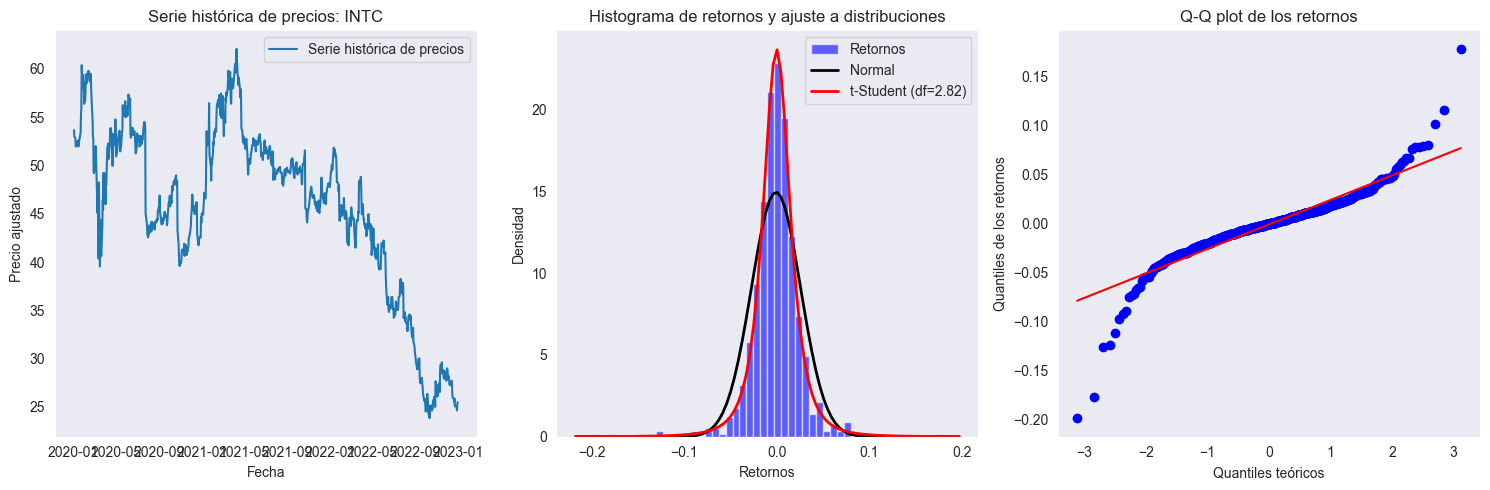

In [19]:
# Genera Histograma y Trayectora de acciones de INTC
plot_stock_returns_with_distribution('INTC', '2020-01-01', '2023-01-01')

#### Leptokurtosis

Las series de retornos muestran una forma de leptocurtosis, es decir, tienen peaks más altos y colas más gruesas (fat tails) que la distribución normal. Esto refleja la mayor frecuencia de movimientos pequeños y de movimientos extremos en comparación con una distribución normal.

#### Volatilidad Agrupada (Clustering)

La volatilidad de los retornos tiende a agruparse. Esto significa que periodos de alta volatilidad tienden a ser seguidos por más periodos de alta volatilidad, y periodos de baja volatilidad tienden a ser seguidos por más periodos de baja volatilidad. Este fenómeno es conocido como agrupamiento de volatilidad o volatilidad autocorrelacionada.

In [20]:
def plot_volatility_clustering(ticker, start_date, end_date, window_size=20):
    # Descargar datos de la serie financiera
    data = yf.download(ticker, start=start_date, end=end_date, progress = False)

    # Calcular los retornos logarítmicos
    data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))

    # Calcular la volatilidad móvil (desviación estándar) sobre los retornos
    data['Volatility'] = data['Returns'].rolling(window = window_size).std() * np.sqrt(window_size)  # Escalar por la raíz del tamaño de ventana

    # Crear subplots: uno para la serie de precios y otro para la volatilidad
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Subplot 1: Serie histórica de precios
    ax1.plot(data['Close'], label='Serie histórica de precios')
    ax1.set_title(f'Serie histórica de precios: {ticker}')
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Precio ajustado')
    ax1.legend()

    # Subplot 2: Volatilidad agrupada de los retornos
    ax2.plot(data['Volatility'], color='red', label=f'Volatilidad ({window_size}-días)')
    ax2.set_title('Volatilidad agrupada de los retornos')
    ax2.set_xlabel('Fecha')
    ax2.set_ylabel('Volatilidad')
    ax2.legend()

    # Ajustar el layout
    plt.tight_layout()
    plt.show()

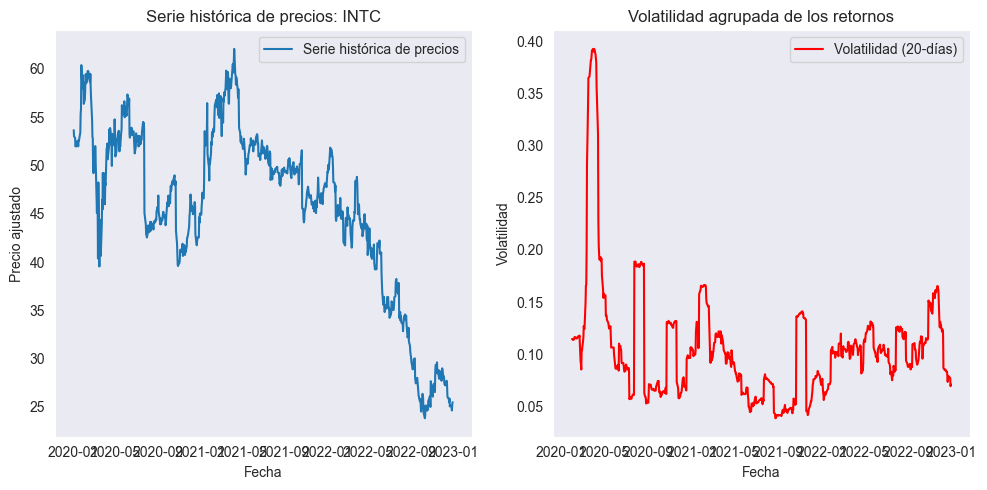

In [21]:
# Ejemplo de uso
plot_volatility_clustering('INTC', '2020-01-01', '2023-01-01', window_size=20)

#### Asimetría en las Volatilidades

La asimetría en una serie de retornos, particularmente en el contexto del efecto de apalancamiento (`Leverage Effect`), se refiere a la relación entre la volatilidad y los retornos. En muchas series financieras, se observa que cuando los retornos son negativos (pérdidas), la volatilidad tiende a aumentar más que cuando los retornos son positivos (ganancias). Este fenómeno es conocido como el efecto de apalancamiento.

Existen diferentes formas para detectar la asimetria en la serie de retornos, por ejemplo:

1. `Regresion Asimetrica de Volatilidad` : Es un enfoque utilizado en econometría financiera para capturar la relación no simétrica entre los retornos de un activo y su volatilidad. Este fenómeno es conocido como el efecto de apalancamiento o asimetría en la volatilidad, donde las caídas (retornos negativos) suelen aumentar más la volatilidad que los incrementos (retornos positivos) de magnitudes equivalentes. El modelo introduce términos específicos para reflejar la sensibilidad de la volatilidad a los retornos positivos y negativos de manera diferente. En términos generales, la especificación básica es  $\sigma_{t}^2 = \omega + \alpha r_{t-1}^2 + \gamma r_{t-1}^2 + \mathbb{I}(r_{t-1}<0)+\beta\sigma_{t-1}^2$ Donde $\sigma_{t}^2$ es la varianza condicional en el tiempo $t$, $r_{t-1}$ es el retorno en el periodo $t-1$, $ \mathbb{I}(r_{t-1}<0)$ es una funcion indicadora que vale 1 si $r_{t-1} < 0$ y 0 en otro caso. $\omega$ es una constante que captura la varianza a largo plazo, $\alpha$ representa el impacto de los shocks de mercado (retornos) sobre la varianza condicional, independientemente de su signo. $\gamma$ captura el efecto diferencial en la volatilidad cuando los retornos son negativo y $\beta$ representa la persistencia de la volatilidad.

2. `Modelos Garch Asimetricos (EGARCH - GJR-GARCH)` : Los modelos GARCH (Generalized Autoregressive Conditional Heteroskedasticity) son utilizados para modelar la volatilidad de series temporales financieras. Existen versiones de GARCH que permiten capturar el efecto de apalancamiento:

    2.1. `EGARCH`: Este modelo permite que la volatilidad reaccione de manera diferente a los retornos positivos y negativos, reflejando la asimetría.

    2.2. `GJR-GARCH`:  Introduce un término adicional que considera el efecto asimétrico de los retornos negativos sobre la volatilidad.

3. `Coeficiente de Asimetria` : El coeficiente de asimetría mide el sesgo de la distribución de los retornos. Un valor de skewness negativo indica que la distribución de los retornos tiene una cola más larga hacia los rendimientos negativos, lo cual es característico de la asimetría en el contexto del efecto de apalancamiento. La formula es:

\begin{equation*}
\hbox{Skewness} = \frac{\sum_{i=1}^{N}(r_i - \bar{r})^3}{(N-1)s^2}
\end{equation*}

In [22]:
# Skewness de los retornos de INT
skewness = return_intc['INTC'].skew()
print(f'\nCoeficiente de asimetría (Skewness): {skewness:.2f}')


Coeficiente de asimetría (Skewness): -0.05


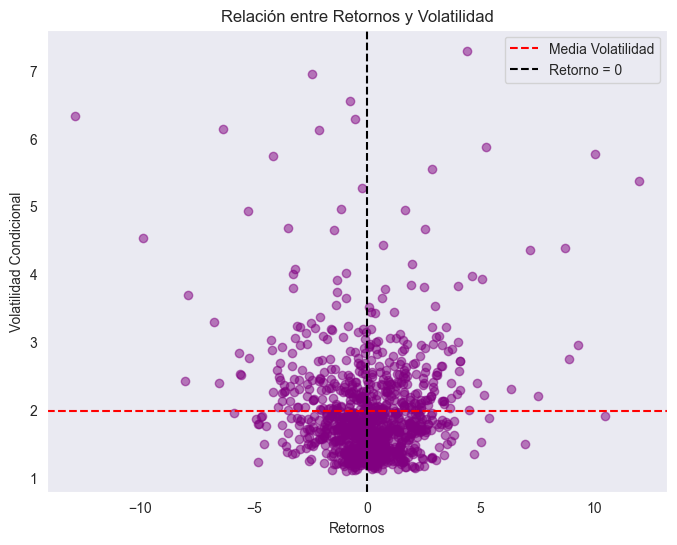

In [23]:
from arch import arch_model

# Descargar datos históricos de un activo financiero
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01', progress = False)
data['Returns'] = data['Close'].pct_change().dropna()*100

# Ajustar un modelo GARCH(1,1) para capturar la volatilidad
model = arch_model(data['Returns'].dropna(), vol='Garch', p=1, q=1)
results = model.fit(disp='off')

# Obtener la volatilidad condicional estimada
data['Volatility'] = results.conditional_volatility

# Analizar la relación entre retornos y volatilidad
plt.figure(figsize=(8, 6))
plt.scatter(data['Returns'], data['Volatility'], alpha=0.5, color='purple')
plt.axhline(data['Volatility'].mean(), linestyle='--', color='red', label='Media Volatilidad')
plt.axvline(0, linestyle='--', color='black', label='Retorno = 0')
plt.title('Relación entre Retornos y Volatilidad')
plt.xlabel('Retornos')
plt.ylabel('Volatilidad Condicional')
plt.legend()
plt.show()

#### Ausencia de Correlación en Retornos, pero Correlación en la Volatilidad

Los retornos de las series financieras suelen ser aproximadamente no correlacionados (especialmente a corto plazo), lo que implica que es difícil predecir el nivel de retornos futuros a partir de los pasados. Sin embargo, la volatilidad sí muestra autocorrelación, como lo refleja el fenómeno de clustering.

En general, el retorno de las series $r_t$ se expresa como:

\begin{equation*} 
r_t = \mu_t + \epsilon 
\end{equation*}

Donde $r_t$ es el retorno en el tiempo $t$, $\mu_t$ es la media condicional de los retornos que puede ser constante o depender de otros factores, $\epsilon_t$ es el componente de error (ruido blanco) que captura la parte impredecible de los retornos y que tiene varianza condicional $\sigma_t^2$

El error $\epsilon_t$ se modela de manera que:

\begin{equation*}  
\epsilon_t = \sigma_t z_t
\end{equation*}

Donde $\sigma_t$ es la desviacion standar condicional (volatilidad) en el tiempo $t$ y $z_t$ es un termino de ruido blanco estandarizado (normalmente distribuido con media 0 y varianza 1).

### Modelos ARCH($p$)

Este modelo fue propuesto por Engle en 1982 y su formulacion es del siguiente estilo:

\begin{equation*}
\begin{aligned}
r_t &= \mu + \epsilon_t \\
\epsilon_t &= \sigma_t z_t \quad z_t \sim\mathcal{N}(0,1) \\
\sigma_t ^2 &= \omega + \sum_{i=1}^{p}\alpha_i\epsilon_{t-i}^2
\end{aligned}
\end{equation*}

Contexto de uso:

* Se utiliza principalmente cuando hay evidencia de que la volatilidad de la serie de tiempo no es constante y muestra `agrupamiento de volatilidad`, es decir, períodos de alta volatilidad seguidos de otros períodos de alta volatilidad.

Debilidades:
* El modelo asume que los shocks positivos y negativos tienen similares efectos sobre la serie de retornos porque depende del cuadrado del shock
previo. En la practica, los shocks financieros suelen tener un comportamiento distinto frente a shocks positivos que a negativos.

In [24]:
# Ejemplo : Estimacion ARCH sobre Retornos de Apple

# Descarga Datos Apple
ticker = 'AAPL'
data = yf.download(ticker, start = '2015-01-01', end = '2024-01-01', progress = False)
closing_prices = data['Close']

# Genero Retornos (escalar por 100)
returns = 100*closing_prices.pct_change().dropna()

# Ajustamos un modelo ARCH(1)
model  = arch_model(returns, vol='ARCH', p = 1)
result = model.fit()

# Resumen del modelo ajustado
print(result.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 233416.0236601682
Iteration:      2,   Func. Count:     12,   Neg. LLF: 4700.26826463477
Iteration:      3,   Func. Count:     18,   Neg. LLF: 4601.722258596785
Iteration:      4,   Func. Count:     24,   Neg. LLF: 4496.128188985485
Iteration:      5,   Func. Count:     28,   Neg. LLF: 4496.128180575184
Iteration:      6,   Func. Count:     31,   Neg. LLF: 4496.128180575175
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4496.128180575184
            Iterations: 6
            Function evaluations: 31
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4496.13
Distribution:                  Normal   AIC:  

### Diagnostico del Modelo

#### Residuos Estandarizados

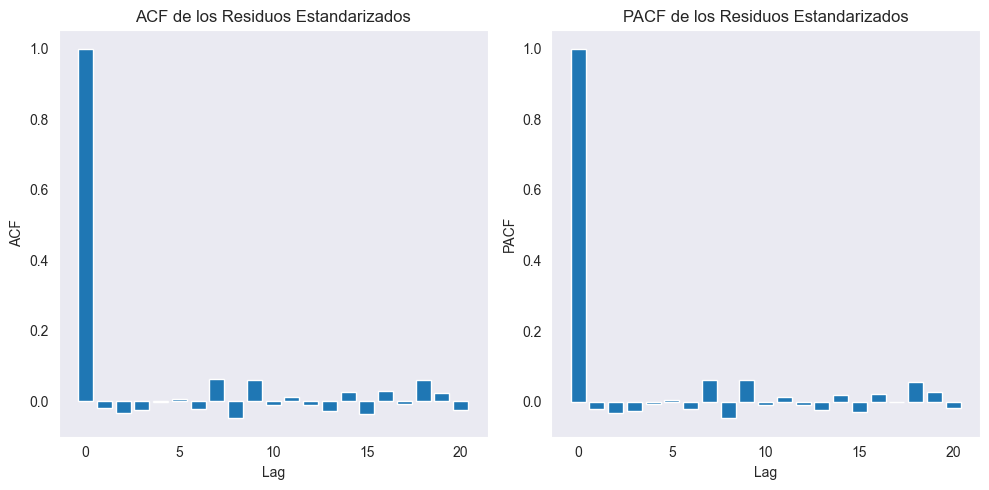

In [25]:
from statsmodels.tsa.stattools import acf, pacf

resid = result.resid / result.conditional_volatility

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
acf_vals = acf(resid, nlags = 20)
pacf_vals = pacf(resid, nlags = 20)

ax[0].bar(range(len(acf_vals)), acf_vals)
ax[0].set_title('ACF de los Residuos Estandarizados')
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('ACF')

ax[1].bar(range(len(pacf_vals)), pacf_vals)
ax[1].set_title('PACF de los Residuos Estandarizados')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('PACF')

plt.tight_layout()
plt.show()

**`Interpretacion`** : Si el ACF y PACF de los residuos no muestran autocorrelación significativa, indica que el modelo ha capturado bien la dependencia temporal.

#### Test de Ljung-Box en los cuadrados de los residuos

El test de `Ljung-Box` aplicado a los residuos al cuadrado verifica la presencia de autocorrelaciones en los cuadrados de los residuos estándar, lo cual es importante en un contexto de heterocedasticidad.

$H_0$: No hay autocorrelación significativa en los cuadrados de los residuos.

$H_1$: Existe autocorrelación significativa en los cuadrados de los residuos.

Interpretacion:
* Si el $p$-valor es bajo ($p$ < 0.05), rechazamos la hipótesis nula, lo que indica que quedan efectos de heterocedasticidad por modelar, y el modelo ARCH puede no ser suficiente.

* Si el $p$-valor es alto (p > 0.05), no rechazamos la hipótesis nula, lo que sugiere que el modelo ha capturado adecuadamente la heterocedasticidad condicional.

In [26]:
from statsmodels.stats.diagnostic import acorr_ljungbox

def check_autocorrelation_ljungbox(residuals, lags=10, alpha=0.05):
    """
    Realiza la prueba de Ljung-Box para verificar la autocorrelación de los residuos.

    :param residuals: array-like, residuos del modelo.
    :param lags: int, el número de rezagos para la prueba.
    :param alpha: float, nivel de significancia para la prueba.
    :return: DataFrame con resultados de la prueba y si se rechaza o no la hipótesis nula de no autocorrelación.
    """
    ljungbox_result = acorr_ljungbox(residuals, lags=[lags], return_df=True)
    ljungbox_result['Reject H0 (No Autocorrelation)'] = ljungbox_result['lb_pvalue'] < alpha
    return ljungbox_result


In [27]:
# Aplica Test de Ljung-Box
ljungbox_result = check_autocorrelation_ljungbox(result.resid**2, lags = 10, alpha = 0.05)
print(ljungbox_result)

        lb_stat      lb_pvalue  Reject H0 (No Autocorrelation)
10  1004.292168  2.224856e-209                            True


#### Test ARCH-LM

La prueba `ARCH-LM` evalúa si hay efectos ARCH residuales (heterocedasticidad) en los residuos del modelo ajustado.

$H_0$: No hay efectos ARCH residuales (es decir, el modelo ARCH ajustado ha capturado bien la volatilidad).

$H_1$: Hay efectos ARCH residuales (el modelo no ha capturado toda la heterocedasticidad).

Interpretacion:
* Si el $p$-valor es bajo ($p$ < 0.05), rechazamos la hipótesis nula, lo que indica que hay efectos ARCH residuales. Esto sugiere que el modelo no ha sido suficiente para capturar la heterocedasticidad y podría necesitar ajustes adicionales (como aumentar el número de lags).

* Si el $p$-valor es alto ($p$ > 0.05), no rechazamos la hipótesis nula, lo que sugiere que el modelo ARCH ha capturado adecuadamente los efectos de heterocedasticidad.

In [28]:
from statsmodels.stats.diagnostic import het_arch

def check_heteroscedasticity_arch(residuals, alpha=0.05):
    """
    Realiza la prueba ARCH para verificar la heterocedasticidad de los residuos.

    :param residuals: array-like, residuos del modelo.
    :param alpha: float, nivel de significancia para la prueba.
    :return: Diccionario con el estadístico F, p-valor, y si se rechaza la hipótesis nula de no heterocedasticidad.
    """
    arch_test_result = het_arch(residuals)
    result_dict = {
        'F-statistic': arch_test_result[0],
        'p-value': arch_test_result[1],
        'Reject H0 (No Heteroscedasticity)': arch_test_result[1] < alpha
    }
    return result_dict


In [29]:
# Aplica Test Arch
arch_test_result = check_heteroscedasticity_arch(result.resid, alpha=0.05)
print(arch_test_result)

{'F-statistic': np.float64(371.9971969802637), 'p-value': np.float64(8.492826351599514e-74), 'Reject H0 (No Heteroscedasticity)': np.True_}


#### Test ARCH-LM Comparacion de Modelos con AIC y BIC

AIC (Akaike Information Criterion) y BIC (Bayesian Information Criterion) son criterios para comparar modelos.

Interpretacion:
* Un AIC o BIC más bajo sugiere un mejor balance entre la bondad de ajuste y la parsimonia del modelo (menos complejidad).

* Estos criterios son útiles para seleccionar entre diferentes especificaciones de modelos ARCH (por ejemplo, ARCH(1) vs. ARCH(2)).

* Sin embargo, solo deben compararse los AIC/BIC de modelos ajustados a los mismos datos y utilizando la misma metodología

In [30]:
print(f'AIC: {result.aic}')
print(f'BIC: {result.bic}')

AIC: 8998.256361150368
BIC: 9015.429701087269


#### Verificacion Visual de la Volatilidad Ajustada

Graficar la volatilidad condicional estimada junto con la serie de retornos permite observar si el modelo ha capturado los períodos de alta y baja volatilidad.

Interpretacion:

* Si la volatilidad ajustada muestra peaks en los mismos puntos donde la serie de retornos muestra alta variabilidad, indica que el modelo ARCH ha capturado bien los cambios en la volatilidad.

* Si no es así, es posible que la estructura del modelo necesite ajustes, como un mayor número de términos ARCH o considerar un modelo más complejo como un GARCH.

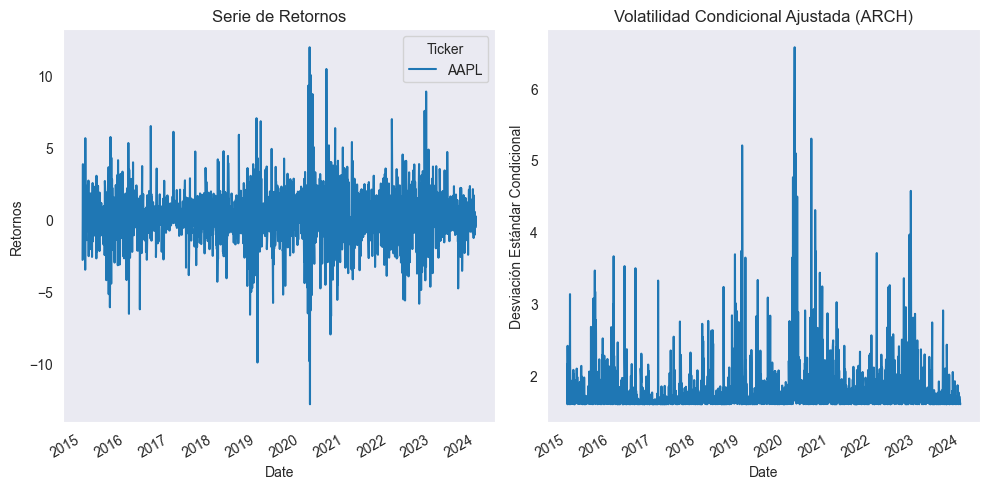

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
returns.plot(ax=ax[0])
ax[0].set_title('Serie de Retornos')
ax[0].set_ylabel('Retornos')

result.conditional_volatility.plot(ax=ax[1])
ax[1].set_title('Volatilidad Condicional Ajustada (ARCH)')
ax[1].set_ylabel('Desviación Estándar Condicional')

plt.tight_layout()
plt.show()

#### Test de Normalidad de los Residuos

La prueba de Jarque-Bera evalúa si los residuos estándar siguen una distribución normal.

$H_0$: Los residuos estándar son normales.

$H_1$: Los residuos estándar no son normales.

Interpretacion:
* Un $p$-valor bajo ($p$ < 0.05) sugiere que los residuos no siguen una distribución normal, lo cual es común en series financieras debido a la presencia de colas pesadas (kurtosis alta).

* Un $p$-valor alto ($p$ > 0.05) indica que los residuos no son significativamente diferentes de una distribución normal. Esto puede ser deseable si se busca realizar inferencias que asuman normalidad, aunque no es un requisito estricto para modelos de heterocedasticidad.

In [32]:
from scipy.stats import jarque_bera
jb_test = jarque_bera(resid)
print('Test de Jarque-Bera:')
print(f'Estadístico: {jb_test[0]}, p-valor: {jb_test[1]}')

Test de Jarque-Bera:
Estadístico: 1488.9881003798876, p-valor: 0.0


### Modelo GARCH($p$,$q$)

A pesar que el modelo ARCH es simple, a veces requiere demasiados parametros a estimar para describir adecuadamente la volatilidad, una generalizacion del modelo ARCH, fue propuesta por Bollerslev (1986) y es conocido como GARCH.

Un modelo GARCH($p$,$q$) extiende el modelo ARCH($p$) al incluir terminos autoregresivos sobre la propia varianza condicional:


\begin{equation*}
\sigma_t^2 = \omega + \sum_{i=1}^{p}\alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{q}\beta_j  \sigma^2_{t-j}
\end{equation*}


El modelo GARCH mas frecuente, es el de orden $p=q=1$ GARCH(1,1)

\begin{equation*}
\sigma_t^2 = \omega + \alpha_1 \epsilon_{t-1}^2 + \beta_1  \sigma^2_{t-1}
\end{equation*}

Contexto de uso:

* Se utiliza cuando los datos muestran períodos prolongados de alta o baja volatilidad que no pueden capturarse adecuadamente con un modelo ARCH simple. Es muy usado en mercados financieros para modelar la volatilidad de retornos de activos, ya que estos suelen mostrar persistencia en la volatilidad.

In [33]:
# Estimación de un modelo GARCH(1, 1)
model_garch = arch_model(returns, vol='GARCH', p=1, q=1)
results_garch = model_garch.fit(disp='off')
print(results_garch.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4337.93
Distribution:                  Normal   AIC:                           8683.86
Method:            Maximum Likelihood   BIC:                           8706.76
                                        No. Observations:                 2263
Date:                Tue, Jul 15 2025   Df Residuals:                     2262
Time:                        03:12:55   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1809  3.418e-02      5.294  1.195e-07 [  0.114,  0.24

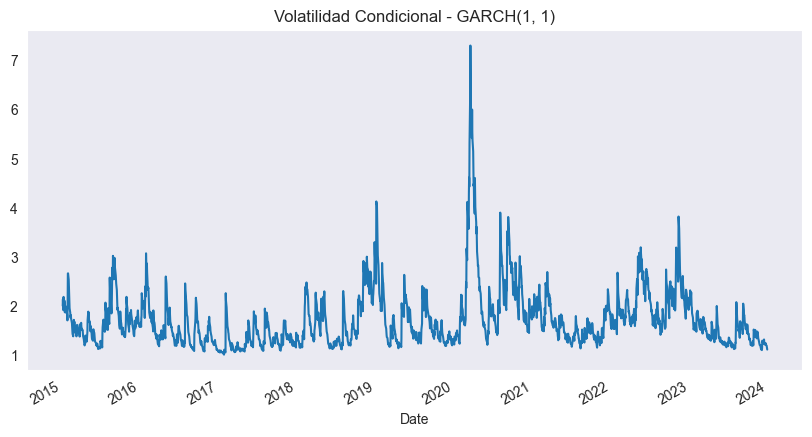

In [34]:
# Gráfica de la volatilidad condicional ajustada
results_garch.conditional_volatility.plot(title='Volatilidad Condicional - GARCH(1, 1)', figsize=(10, 5))
plt.show()

### Modelo EGARCH($p$,$q$)

\begin{equation*}
\ln{(\sigma_t ^2)} = \omega + \sum_{i=1}^{p}\alpha_{i}\frac{\epsilon_{t-i}}{\sigma_{t-i}} + \sum_{j=1}^{q}\beta_{j}\ln{(\sigma_{t-j}^2)} +
\sum_{i=1}^{p}\gamma_{i}\left|\frac{\epsilon_{t-i}}{\sigma_{t-i}}\right|
\end{equation*}

La varianza condicional esta modelada en terminos de su logaritmo, lo que garantiza que $\sigma_t^2$ sea siempre positiva. $\gamma_i$ es el parametro que captura asimetria permitiendo que choques positivos y negativos afecten de manera diferente a la volatilidad.

In [35]:
# Estimación de un modelo EGARCH(1, 1)
model_egarch = arch_model(returns, vol='EGARCH', p=1, q=1)
results_egarch = model_egarch.fit(disp='off')
print(results_egarch.summary())

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -4340.07
Distribution:                  Normal   AIC:                           8688.14
Method:            Maximum Likelihood   BIC:                           8711.04
                                        No. Observations:                 2263
Date:                Tue, Jul 15 2025   Df Residuals:                     2262
Time:                        03:12:56   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1974  3.989e-02      4.947  7.539e-07 [  0.119,  0.27

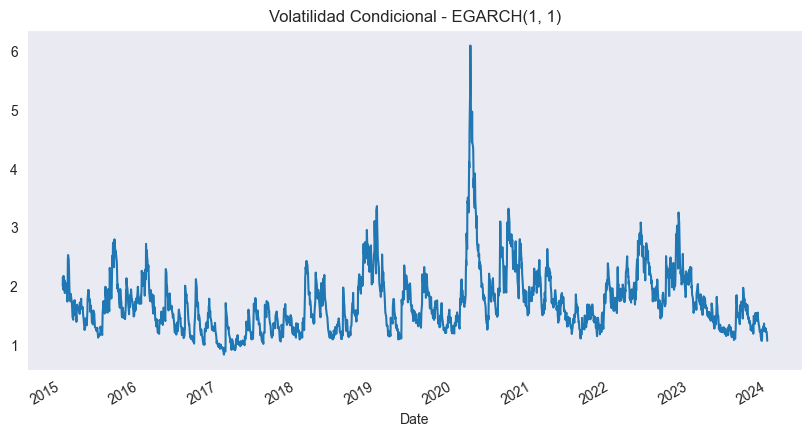

In [36]:
# Gráfica de la volatilidad condicional ajustada
results_egarch.conditional_volatility.plot(title='Volatilidad Condicional - EGARCH(1, 1)', figsize=(10, 5))
plt.show()

### Modelo GJR-GARCH($p$, $q$)

\begin{equation*}
\sigma_t^2 = \omega + \sum_{i=1}^{p}\alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{q}\beta_j  \sigma^2_{t-j} + \sum_{i=1}^{p}\gamma_{i}\epsilon_{t-i}^2 \mathcal{I}(\epsilon_{t-1}<0)
\end{equation*}

Donde $\mathcal{I}(\epsilon_{t-i})$ es una funcion indicatriz que toma el valor de 1 si $\epsilon_{t-i}$ es negativo, y 0 en otro caso. El parametro $\gamma_i$ es el coeficiente que captura la asimetria (efecto apalancamiento)

In [37]:
# Estimación de un modelo GJR-GARCH(1, 1)
model_gjr_garch = arch_model(returns, vol='GARCH', p=1, q=1, o=1, dist='normal')
results_gjr_garch = model_gjr_garch.fit(disp='off')
print(results_gjr_garch.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -4308.21
Distribution:                  Normal   AIC:                           8626.43
Method:            Maximum Likelihood   BIC:                           8655.05
                                        No. Observations:                 2263
Date:                Tue, Jul 15 2025   Df Residuals:                     2262
Time:                        03:12:56   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1297  3.147e-02      4.120  3.787e-05 [6.798e-0

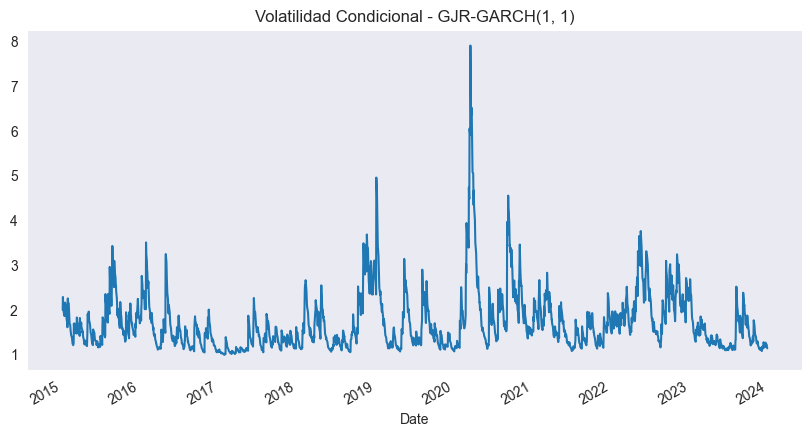

In [38]:
# Gráfica de la volatilidad condicional ajustada
results_gjr_garch.conditional_volatility.plot(title='Volatilidad Condicional - GJR-GARCH(1, 1)', figsize=(10, 5))
plt.show()

En resumen:

* `ARCH`: Modela la volatilidad condicional en función de los errores pasados al cuadrado, capturando la heterocedasticidad.

* `GARCH`: Extiende ARCH al incluir la varianza condicional pasada, lo que mejora la persistencia de la volatilidad.

* `EGARCH`: Modela la volatilidad en términos logarítmicos, permitiendo capturar asimetría y garantizando positividad.

* `GJR-GARCH`: Introduce un término específico para choques negativos, adaptándose mejor al efecto de apalancamiento.

### Forecast 

In [39]:
def fit_garch(returns, dist='normal'):
    """
    Ajusta un modelo GARCH(1,1) con una distribución específica.

    Parámetros:
    returns: array-like
        Serie de retornos.
    dist: str
        Tipo de distribución a utilizar ('normal', 't', 'skewt').

    Retorna:
    results: ModelFit
        Resultados del ajuste del modelo.
    """
    model = arch_model(returns, vol='GARCH', p = 1, q = 1, dist = dist)
    results = model.fit(disp = 'off')
    return results

In [40]:
def fit_egarch(returns, dist='normal'):
    """
    Ajusta un modelo EGARCH(1,1) con una distribución específica.

    Parámetros:
    returns: array-like
        Serie de retornos.
    dist: str
        Tipo de distribución a utilizar ('normal', 't', 'skewt').

    Retorna:
    results: ModelFit
        Resultados del ajuste del modelo.
    """
    model = arch_model(returns, vol='EGARCH', p=1, q=1, dist=dist)
    results = model.fit(disp='off')
    return results

In [41]:
def fit_gjr_garch(returns, dist='normal'):
    """
    Ajusta un modelo GJR-GARCH(1,1) con una distribución específica.

    Parámetros:
    returns: array-like
        Serie de retornos.
    dist: str
        Tipo de distribución a utilizar ('normal', 't', 'skewt').

    Retorna:
    results: ModelFit
        Resultados del ajuste del modelo.
    """
    model = arch_model(returns, vol='GARCH', p=1, o=1, q=1, dist=dist)
    results = model.fit(disp='off')
    return results

In [42]:
# Ajuste de los modelos con distribucion normal
results_garch = fit_garch(returns, dist='normal')
results_egarch = fit_egarch(returns, dist='normal')
results_gjr_garch = fit_gjr_garch(returns, dist='normal')

# Extraer las volatilidades condicionales estimadas para cada ajuste
volatility_garch = results_garch.conditional_volatility
volatility_egarch = results_egarch.conditional_volatility
volatility_gjr_garch = results_gjr_garch.conditional_volatility

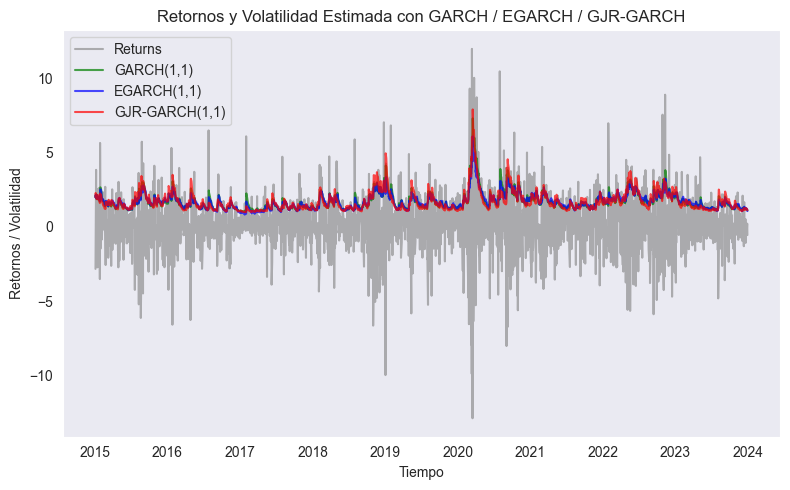

In [43]:
# Crear un DataFrame con los retornos y las volatilidades
df_volatility = pd.DataFrame({
    'Returns': returns['AAPL'],
    'Volatility_GARCH': volatility_garch,
    'Volatility_EGARCH': volatility_egarch,
    'Volatility_GJR_GARCH': volatility_gjr_garch
})

# Gráfico de retornos y volatilidades estimadas
plt.figure(figsize=(8, 5))
plt.plot(df_volatility['Returns'], label='Returns', color='gray', alpha=0.6)
plt.plot(df_volatility['Volatility_GARCH'], label='GARCH(1,1)', color='green', alpha=0.7)
plt.plot(df_volatility['Volatility_EGARCH'], label='EGARCH(1,1)', color='blue', alpha=0.7)
plt.plot(df_volatility['Volatility_GJR_GARCH'], label='GJR-GARCH(1,1)', color='red', alpha=0.7)
plt.title('Retornos y Volatilidad Estimada con GARCH / EGARCH / GJR-GARCH')
plt.xlabel('Tiempo')
plt.ylabel('Retornos / Volatilidad')
plt.legend()
plt.tight_layout()
plt.show()

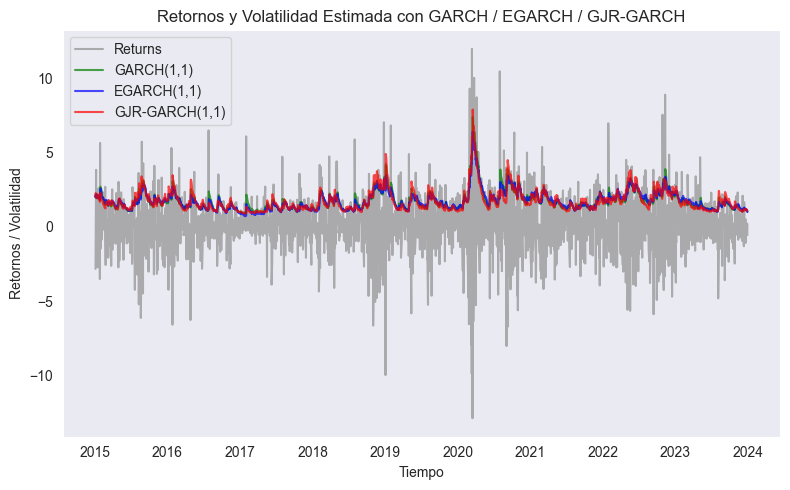

In [44]:
# Ajuste de los modelos con distribucion t-student
results_garch = fit_garch(returns, dist='t')
results_egarch = fit_egarch(returns, dist='t')
results_gjr_garch = fit_gjr_garch(returns, dist='t')

# Extraer las volatilidades condicionales estimadas para cada ajuste
volatility_garch = results_garch.conditional_volatility
volatility_egarch = results_egarch.conditional_volatility
volatility_gjr_garch = results_gjr_garch.conditional_volatility

# Crear un DataFrame con los retornos y las volatilidades
df_volatility = pd.DataFrame({
    'Returns': returns['AAPL'],
    'Volatility_GARCH': volatility_garch,
    'Volatility_EGARCH': volatility_egarch,
    'Volatility_GJR_GARCH': volatility_gjr_garch
})

# Gráfico de retornos y volatilidades estimadas
plt.figure(figsize=(8, 5))
plt.plot(df_volatility['Returns'], label='Returns', color='gray', alpha=0.6)
plt.plot(df_volatility['Volatility_GARCH'], label='GARCH(1,1)', color='green', alpha=0.7)
plt.plot(df_volatility['Volatility_EGARCH'], label='EGARCH(1,1)', color='blue', alpha=0.7)
plt.plot(df_volatility['Volatility_GJR_GARCH'], label='GJR-GARCH(1,1)', color='red', alpha=0.7)
plt.title('Retornos y Volatilidad Estimada con GARCH / EGARCH / GJR-GARCH')
plt.xlabel('Tiempo')
plt.ylabel('Retornos / Volatilidad')
plt.legend()
plt.tight_layout()
plt.show()

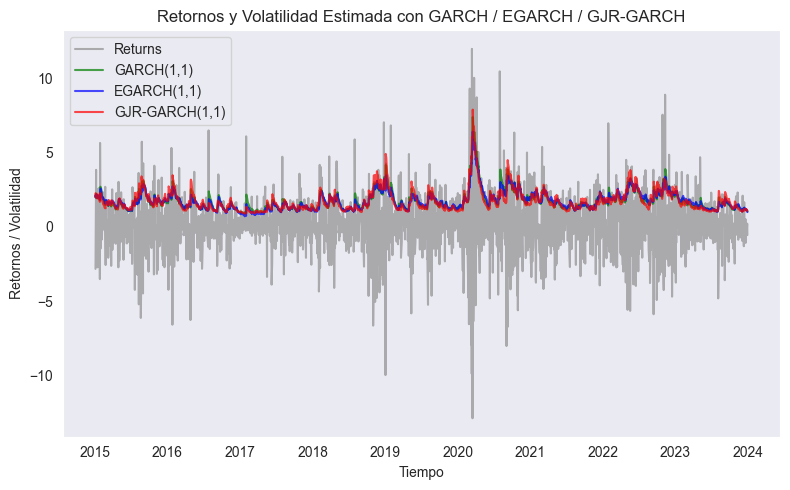

In [45]:
# Ajuste de los modelos con distribucion asimetrica
results_garch = fit_garch(returns, dist='skewt')
results_egarch = fit_egarch(returns, dist='skewt')
results_gjr_garch = fit_gjr_garch(returns, dist='skewt')

# Extraer las volatilidades condicionales estimadas para cada ajuste
volatility_garch = results_garch.conditional_volatility
volatility_egarch = results_egarch.conditional_volatility
volatility_gjr_garch = results_gjr_garch.conditional_volatility

# Crear un DataFrame con los retornos y las volatilidades
df_volatility = pd.DataFrame({
    'Returns': returns['AAPL'],
    'Volatility_GARCH': volatility_garch,
    'Volatility_EGARCH': volatility_egarch,
    'Volatility_GJR_GARCH': volatility_gjr_garch
})

# Gráfico de retornos y volatilidades estimadas
plt.figure(figsize=(8, 5))
plt.plot(df_volatility['Returns'], label='Returns', color='gray', alpha=0.6)
plt.plot(df_volatility['Volatility_GARCH'], label='GARCH(1,1)', color='green', alpha=0.7)
plt.plot(df_volatility['Volatility_EGARCH'], label='EGARCH(1,1)', color='blue', alpha=0.7)
plt.plot(df_volatility['Volatility_GJR_GARCH'], label='GJR-GARCH(1,1)', color='red', alpha=0.7)
plt.title('Retornos y Volatilidad Estimada con GARCH / EGARCH / GJR-GARCH')
plt.xlabel('Tiempo')
plt.ylabel('Retornos / Volatilidad')
plt.legend()
plt.tight_layout()
plt.show()

### Simulacion de Volatilidad Estocastica

In [46]:
ticker = 'AAPL'
data = yf.download(ticker, start = "2020-01-01", end = "2023-01-01", progress = False)
data.columns = data.columns.droplevel(1)
data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.620865,72.681312,71.373241,71.627115,135480400
2020-01-03,71.914841,72.676470,71.689980,71.847141,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307495,73.609729,71.849518,71.849518,132079200


In [47]:
data['returns'] = data['Close'].pct_change()*100
data.dropna(inplace = True)
data.head()

Price,Close,High,Low,Open,Volume,returns
Date,,,,,,
2020-01-03,71.914841,72.676470,71.689980,71.847141,146322800,-0.972206
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200,0.796794
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000,-0.470302
2020-01-08,73.307495,73.609729,71.849518,71.849518,132079200,1.608596
2020-01-09,74.864624,75.058051,74.035295,74.286749,170108400,2.124106


In [48]:
# Estima el modelo ARCH(p)
model  = arch_model(data['returns'], vol='ARCH', p = 1)
result = model.fit(disp = 'off')

# Resumen del modelo ajustado
print(result.summary())

# Genera Forecast para Modelo ARCH  30 dias
forecast = result.forecast(start = 0, horizon = 30)
forecast_volatility = forecast.variance.dropna().values.flatten()

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1679.73
Distribution:                  Normal   AIC:                           3365.46
Method:            Maximum Likelihood   BIC:                           3379.34
                                        No. Observations:                  755
Date:                Tue, Jul 15 2025   Df Residuals:                      754
Time:                        03:12:57   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1550  8.153e-02      1.902  5.721e-02 [-4.75

In [49]:
# Estimacion de Varianza (Volatilidad) en diferentes ventanas de tiempo
forecast.variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.21,h.22,h.23,h.24,h.25,h.26,h.27,h.28,h.29,h.30
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,4.422366,5.107853,5.256945,5.289372,5.296425,5.297959,5.298293,5.298365,5.298381,5.298385,...,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386
2020-01-06,4.235574,5.067226,5.248109,5.287450,5.296007,5.297868,5.298273,5.298361,5.298380,5.298384,...,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386
2020-01-07,4.231049,5.066242,5.247895,5.287404,5.295997,5.297866,5.298273,5.298361,5.298380,5.298384,...,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386
2020-01-08,4.605534,5.147692,5.265610,5.291257,5.296835,5.298048,5.298312,5.298370,5.298382,5.298385,...,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386
2020-01-09,4.989288,5.231157,5.283764,5.295205,5.297694,5.298235,5.298353,5.298378,5.298384,5.298385,...,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,4.187131,5.056690,5.245817,5.286952,5.295899,5.297845,5.298268,5.298360,5.298380,5.298384,...,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386
2022-12-27,4.663739,5.160351,5.268363,5.291856,5.296965,5.298077,5.298318,5.298371,5.298382,5.298385,...,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386
2022-12-28,6.406089,5.539309,5.350786,5.309783,5.300864,5.298925,5.298503,5.298411,5.298391,5.298387,...,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386,5.298386


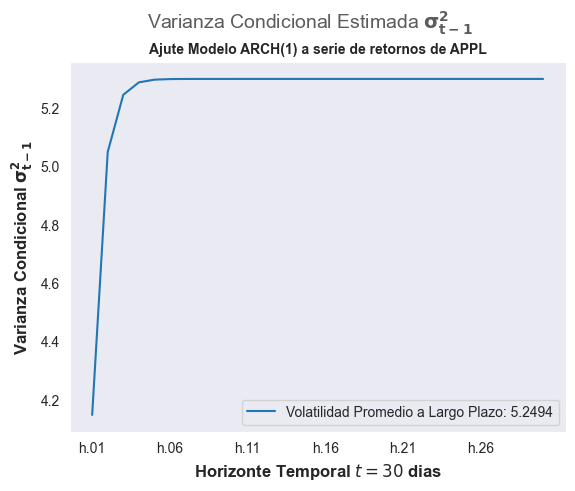

In [50]:
# Visualizacion de la Varianza Estimada en el tiempo 
long_term_volatility = forecast.variance.iloc[-1, :].mean()
ax = forecast.variance.iloc[-1, :].plot(label = f"Volatilidad Promedio a Largo Plazo: {long_term_volatility:.4f}")
plt.suptitle(r"Varianza Condicional Estimada $\bf\sigma_{t-1}^2$", fontsize = 14, y = 0.99, alpha = 0.75)
ax.set_title("Ajute Modelo ARCH(1) a serie de retornos de APPL", fontsize = 10, fontweight = 'bold')
ax.set_xlabel(r"Horizonte Temporal $t = 30$ dias", fontsize = 12, fontweight = 'bold')
ax.set_ylabel(r"Varianza Condicional $\bf\sigma_{t-1}^2$", fontsize = 12, fontweight = 'bold')
ax.legend(loc="lower right", fontsize = 10)
plt.show()

#### Simulacion Modelo ARCH($p$)

Recordar que el modelo `ARCH(p)` describe la dinámica de la varianza condicional $\sigma_t ^ 2$ a través de la siguiente formulación :

\begin{equation*}
\begin{aligned}
r_t &= \mu + \epsilon_t \\
\epsilon_t &= \sigma_t z_t \quad z_t \sim\mathcal{N}(0,1) \\
\sigma_t ^2 &= \omega + \sum_{i=1}^{p}\alpha_i\epsilon_{t-i}^2
\end{aligned}
\end{equation*}


Para inicializar la simulacion, definiremos condiciones iniciales para la volatilidad y los retornos, estos estaran dados por: 

* Volatilidad Inicial $\sigma_0 ^ 2$ (Volatilidad Incondicional)  

\begin{equation*}
\sigma_0 ^ 2 = \frac{\omega}{1 - \alpha}
\end{equation*}

* Ruido Inicial $z_0\sim\mathcal{N}(0,1)$

In [51]:
# Mecanismo de Simulacion para proceso ARCH(p)

def simulate_arch_model(data, n_days = 30, n_simulations = 1000): 
    """ Implementa Simulacion de Montecarlo para estimar la volatilidad Condicional de un
        Modelo ARCH(p) 
    
    Parameters :
        - data : dataframe que contiene la columna retorno llamada 'returns'
        - n_days : numero de dias en que el modelo realizara el forecast (30 dias )
        - n_simulations : numero de simulaciones de montecarlo que se haran (1000 simulaciones)

    Return : 
        - Un array que contiene la proyeccion simulada a n_days de la volatilidad 
    """

    # 1. Construye la estimacion del modelo ARCH(p)
    model  = arch_model(data['returns'], vol = 'ARCH', p = 1)
    result = model.fit(disp = "off")

    # 2. Almacena los parametros del modelo estimado 
    omega_hat = result.params['omega']
    alpha_hat = result.params['alpha[1]']

    # 3. Ultima volatilidad estimada (con el cual se inizializara el mecanismo de simulacion)
    sigma2_t  =  result.conditional_volatility.iloc[-1] ** 2 

    # 4. Inicilizacion (Almacenar la Volatilidad Simulada)
    vol_sim = np.zeros((n_days, n_simulations)) 

    # 5. Genero Simulacion de Montecarlo 
    for n_sim in range(n_simulations): 

        # Inicializa la primera simulacion con el sigma previo 
        sigma_forecast = np.sqrt(sigma2_t) 

        for t in range(n_days):

            # Genero variable aleatoria z_t 
            z_t = np.random.normal(0, 1) 
            
            # Genero variable epsilon_t 
            epsilon_t = z_t * sigma_forecast
            
            # Implementacion formulacion modelo ARCH(1)
            sigma2_forecast = omega_hat + alpha_hat * epsilon_t ** 2 
            
            # Almacena la Volatilidad 
            vol_sim[t, n_sim] = sigma2_forecast

     # 6. Genera un promedio a lo largo de las columnas 
    volatility_mean = vol_sim.mean(axis = 1)

    # 7. Muestra en Pantalla Volatilidad Incondicional y Simulada 
    print(f'La volatilidad a largo plazo es', np.round(sigma2_t, 3))

    return volatility_mean
    


In [52]:
# Ejecuta funcion para generar proyecciones a 30 dias con 5000 iteraciones
simulate_arch_model(data, n_days = 30, n_simulations = 5000)

La volatilidad a largo plazo es 5.705


array([5.39522473, 5.41310138, 5.37712342, 5.39493809, 5.40275767,
       5.38941697, 5.37115872, 5.45645631, 5.43289989, 5.39454797,
       5.40729377, 5.37897825, 5.39425948, 5.41818581, 5.41698954,
       5.36561074, 5.35834408, 5.41068281, 5.41090996, 5.44238526,
       5.38520388, 5.41519946, 5.40656384, 5.38629739, 5.40875136,
       5.36663393, 5.43604788, 5.38151821, 5.45103453, 5.38676874])

#### Simulación Modelo GARCH($p$,$q$)

Recordar que el modelo `GARCH(p,q)` describe la dinámica de la varianza condicional $\sigma_t ^ 2$ a través de la siguiente formulación :

\begin{equation*}
\begin{aligned}
r_t &= \mu + \epsilon_t \\
\epsilon_t &= \sigma_t z_t \quad z_t \sim\mathcal{N}(0,1) \\
\sigma_t ^2 &=  \omega + \sum_{i=1}^{p}\alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{q}\beta_j  \sigma^2_{t-j}
\end{aligned}
\end{equation*}


Para inicializar la simulacion, definiremos condiciones iniciales para la volatilidad y los retornos, estos estaran dados por: 

* Volatilidad Inicial $\sigma_0 ^ 2$ (Volatilidad Incondicional)  

\begin{equation*}
\sigma_0 ^ 2 = \frac{\omega}{1 - \alpha - \beta}
\end{equation*}

* Ruido Inicial $z_0\sim\mathcal{N}(0,1)$

In [53]:
# Mecanismo de Simulacion para proceso GARCH(p, q)

def simulate_garch_model(data, n_days = 30, n_simulations = 1000):
    """ Implementa Simulacion de Montecarlo para estimar la volatilidad Condicional de un
        Modelo GARCH(p, q) 
    
    Parameters :
        - data : dataframe que contiene la columna retorno llamada 'returns'
        - n_days : numero de dias en que el modelo realizara el forecast (30 dias )
        - n_simulations : numero de simulaciones de montecarlo que se haran (1000 simulaciones)

    Return : 
        - Un array que contiene la proyeccion simulada a n_days de la volatilidad 
    """
     
    # 1. Construye la estimacion del modelo ARCH(p)
    model  = arch_model(data['returns'], vol = 'GARCH', p = 1, q = 1, rescale = False)
    result = model.fit(disp = "off")

    # 2. Almacena los parametros del modelo estimado 
    omega_hat = result.params['omega']
    alpha_hat = result.params['alpha[1]']
    beta_hat  = result.params['beta[1]']
    
    # 3. Ultima volatilidad estimada (con el cual se inicializara el mecanismo de simulacion)
    sigma2_t  =  result.conditional_volatility.iloc[-1] ** 2

    # 4. Inicilizacion (Almacenar la Volatilidad Simulada)
    vol_sim = np.zeros((n_days, n_simulations))

    # 5. Genero Simulacion de Montecarlo 
    for n_sim in range(n_simulations): 

        # Inicializa la primera simulacion con el sigma previo 
        sigma_forecast = np.sqrt(sigma2_t) 

        for t in range(n_days):

            # Genero variable aleatoria z_t 
            z_t = np.random.normal(0, 1) 
            
            # Genero variable epsilon_t 
            epsilon_t = z_t * sigma_forecast
            
            # Implementacion formulacion modelo GARCH(1, 1)
            sigma2_forecast = omega_hat + (alpha_hat * epsilon_t ** 2 ) + (beta_hat * sigma_forecast ** 2)  
            
            # Almacena la Volatilidad 
            vol_sim[t, n_sim] = sigma2_forecast

    # 6. Genera un promedio a lo largo de las columnas 
    volatility_mean = vol_sim.mean(axis = 1)

    # 7. Muestra en Pantalla Volatilidad Incondicional y Simulada 
    print(f'La volatilidad a largo plazo es', np.round(sigma2_t, 3))

    return volatility_mean

In [54]:
# Ejecuta funcion para generar proyecciones a 30 dias con 5000 iteraciones
simulate_garch_model(data, n_days = 30, n_simulations = 5000)

La volatilidad a largo plazo es 5.296


array([5.29760831, 5.28863384, 5.28163418, 5.30705728, 5.30001458,
       5.32844009, 5.2932137 , 5.2849632 , 5.30948644, 5.30672308,
       5.28323621, 5.28882981, 5.29101622, 5.28809808, 5.28353614,
       5.32604108, 5.30235683, 5.31121902, 5.31531264, 5.31011206,
       5.28094588, 5.29712624, 5.29618931, 5.30702346, 5.29903188,
       5.29132936, 5.28515058, 5.30803685, 5.30751881, 5.31263531])